In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from pathlib import Path
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
path = Path(r"../data/03_processed/01_ready_data.csv")
data = pd.read_csv(path)

In [5]:
data.head()
df = data.drop(columns=["ID", "Adres e-mail", "Nazwa"])

In [6]:
skills_data = df.values

In [7]:
methods = ['ward', 'complete', 'average', 'single']
for method in methods:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage=method)
    labels = hierarchical_clustering.fit_predict(skills_data)
    silhouette_avg = silhouette_score(skills_data, labels)
    davies_bouldin_avg = davies_bouldin_score(skills_data, labels)
    print(f'Method: {method}, Silhouette Score: {silhouette_avg}, Davies-Bouldin Index: {davies_bouldin_avg}')

Method: ward, Silhouette Score: 0.1287671533955062, Davies-Bouldin Index: 1.3616738550311849
Method: complete, Silhouette Score: 0.11081611690665934, Davies-Bouldin Index: 1.3944913995452068
Method: average, Silhouette Score: 0.13322464538759476, Davies-Bouldin Index: 1.222994962177213
Method: single, Silhouette Score: -0.007093504421159265, Davies-Bouldin Index: 0.8091567026137516


c:\Users\glabm\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\glabm\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\glabm\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\glabm\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [8]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_clustering.fit_predict(skills_data)

data['cluster'] = labels
unique_labels = set(labels)
print(data['cluster'].value_counts())

cluster
3    24
2    13
4    10
0     6
1     6
Name: count, dtype: int64


c:\Users\glabm\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


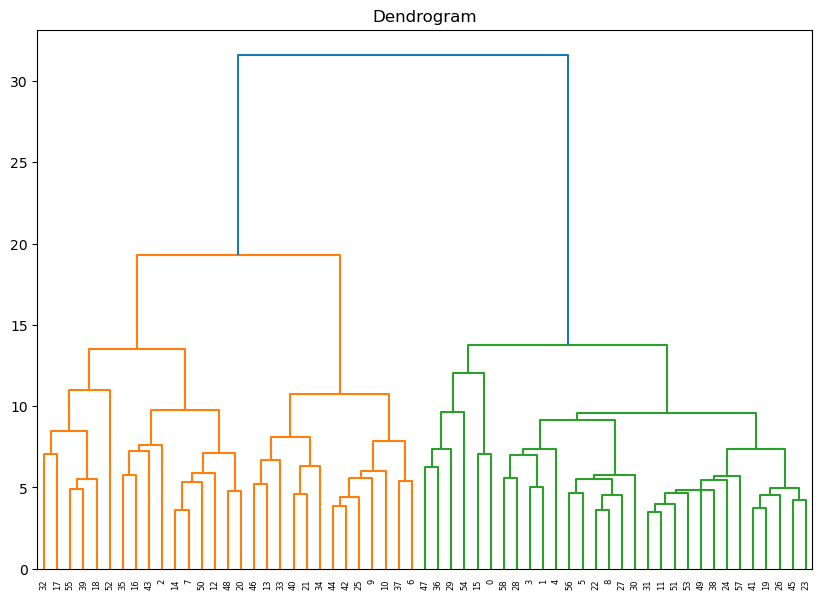

Etykiety klastrów: [0 3 4 3 3 3 2 4 3 2 2 3 4 2 4 0 4 1 1 3 4 2 3 3 3 2 3 3 3 0 3 3 1 2 2 4 0
 2 3 1 2 3 2 4 2 3 2 0 4 3 4 3 1 3 0 1 3 3 3]


In [9]:
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

linked = linkage(skills_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

print("Etykiety klastrów:", labels)

In [10]:
silhouette_avg = silhouette_score(skills_data, labels)
davies_bouldin_avg = davies_bouldin_score(skills_data, labels)

print("Średnia wartość silhouette_score:", silhouette_avg)
print("Średnia wartość davies_bouldin_score:", davies_bouldin_avg)

Średnia wartość silhouette_score: 0.13813970751428342
Średnia wartość davies_bouldin_score: 1.9576635080116265


In [11]:
for i in range(len(data["cluster"].unique())):
    print("Klaster", i)
    print(data[data["cluster"] == i].head(10))

Klaster 0
    ID Adres e-mail  Nazwa  W jaki sposób chcesz uczestniczyć w Community?  \
0    1    anonymous    NaN                                               1   
15  17    anonymous    NaN                                               1   
29  31    anonymous    NaN                                               0   
36  38    anonymous    NaN                                               1   
47  51    anonymous    NaN                                               0   
54  59    anonymous    NaN                                               1   

      R  Python  Bash  GIT  Docker  CLI  ...  FinTech  HealthTech  \
0   2.0     3.0   3.0  4.0     3.0  4.0  ...      3.0         2.0   
15  4.0     4.0   3.0  4.0     4.0  3.0  ...      3.0         2.0   
29  1.0     4.0   4.0  4.0     4.0  4.0  ...      0.0         0.0   
36  4.0     2.0   2.0  4.0     3.0  3.0  ...      2.0         2.0   
47  1.0     4.0   3.0  4.0     4.0  4.0  ...      1.0         4.0   
54  2.0     4.0   4.0  4.0   

In [14]:
file_path = Path(r"../models/04_hierarchical_clustering.pkl")
joblib.dump(hierarchical_clustering, file_path)

['..\\models\\04_hierarchical_clustering.pkl']